In [8]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa, librosa.display
import random as rn
from keras.layers import Dense
from keras import Input
#from keras.engine import 
#from keras.utils import to_categorical

ImportError: cannot import name 'model' from 'keras.engine' (C:\Users\kwarkmc\.conda\envs\capstone\lib\site-packages\keras\engine\__init__.py)

In [10]:
DATA_DIR = 'Data/Audio/'

In [15]:
#sr : 오디오의 초당 샘플링 수, wav : 시계열 데이터
wav, sr = librosa.load(DATA_DIR + '긍1.wav') #자동으로 샘플링의 수를 22050으로 정규화
print('sr : ', sr)
print('wav shape : ', wav.shape)
print('length : ', wav.shape[0]/float(sr), 'secs')

sr :  22050
wav shape :  (101364,)
length :  4.597006802721088 secs


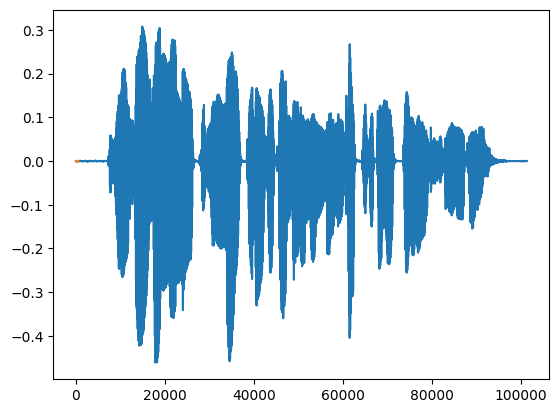

In [17]:
#raw file
print(plt.plot(wav))
print(plt.plot(wav[0:500]))